In [8]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

N = 500
X = np.random.randn(N, 2)


In [9]:
Y = np.zeros((N, 3))
for i in range(N):
    if X[i, 0]**2 + X[i, 1]**2 < 0.5:
        Y[i, 0] = 1
    elif X[i, 0] + X[i, 1] > 1:
        Y[i, 1] = 1
    else:
        Y[i, 2] = 1

In [10]:
class NeuralNetwork(object):
    def __init__(self):
        input_neurons = 2
        hidden1_neurons = 10
        hidden2_neurons = 8
        output_neurons = 3

        self.learning_rate = 0.1


        self.W_H1 = np.random.randn(input_neurons, hidden1_neurons)
        self.W_H2 = np.random.randn(hidden1_neurons, hidden2_neurons)
        self.W_O = np.random.randn(hidden2_neurons, output_neurons)

    def sigmoid(self, x, der=False):
        if der:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def feedForward(self, X):
        self.h1_in = np.dot(X, self.W_H1)
        self.h1_out = self.sigmoid(self.h1_in)

        self.h2_in = np.dot(self.h1_out, self.W_H2)
        self.h2_out = self.sigmoid(self.h2_in)

        self.out_in = np.dot(self.h2_out, self.W_O)
        pred = self.sigmoid(self.out_in)
        return pred

    def backPropagation(self, X, Y, pred):

        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.sigmoid(pred, der=True)


        h2_error = output_delta.dot(self.W_O.T)
        h2_delta = self.learning_rate * h2_error * self.sigmoid(self.h2_out, der=True)


        h1_error = h2_delta.dot(self.W_H2.T)
        h1_delta = self.learning_rate * h1_error * self.sigmoid(self.h1_out, der=True)


        self.W_O += self.h2_out.T.dot(output_delta)
        self.W_H2 += self.h1_out.T.dot(h2_delta)
        self.W_H1 += X.T.dot(h1_delta)

    def train(self, X, Y):
        pred = self.feedForward(X)
        self.backPropagation(X, Y, pred)
        return np.mean(np.square(Y - pred))

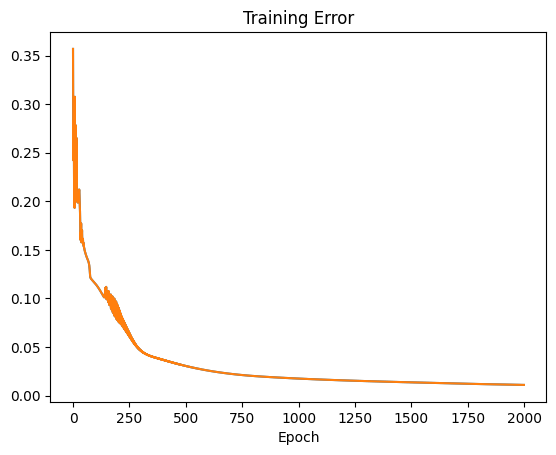

In [11]:
NN = NeuralNetwork()
err = []

for i in range(2000):
    e = NN.train(X, Y)
    err.append(e)

plt.plot(err)
plt.title("Training Error")
plt.xlabel("Epoch")
plt.plot(err)
plt.show()


